In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install seaborn
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


In [3]:
feedback_array = np.load("cliff_walking_feedback_array.npy")
expert_feedback_array = np.load("cliff_walking_expert_feedback_array.npy", )
correct_or_not = np.load("cliff_walking_binary_correct_or_not.npy", )
response_array = np.load("cliff_walking_binary_response.npy")        

In [4]:
response_array = response_array.reshape(feedback_array.shape)

In [5]:
np.where(correct_or_not == 1, 1, 0)

array([[[1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[1, 1, 1, 0, 1],
        [0, 0, 0, 0, 0],
        [0, 1, 1, 1, 0],
        [1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1],
        [0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1],
        [1, 1, 1, 1, 1]],

       [[1, 1, 1, 1, 1],
        [1, 0, 0, 1, 1],
        [1, 0, 1, 1, 0],
        [1, 1, 1, 0, 1]],

       [[1, 1, 1, 0, 0],
        [1, 0, 0, 1, 1],
        [1, 1, 0, 1, 0],
        [1, 1, 0, 1, 1]],

       [[1, 0, 1, 1, 0],
        [1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 1, 1, 1, 1]],

       [[1, 0, 1, 0, 0],
        [1, 1, 0, 1, 1],
        [0, 1, 1, 1, 0],
        [1, 1, 1, 0, 1]],

       [[1, 1, 0, 1, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 1, 0, 1, 1]],

       [[1, 1, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [1, 0, 1, 0, 1]],

       [[0, 1, 1, 0, 0],
        [1, 0, 0, 1, 1],
        [1, 1, 1, 0, 1],
       

In [6]:
repeat = feedback_array.shape[-1]

In [7]:
correction_rate_array = np.where(correct_or_not == 1, 1, 0).sum(-1)/repeat

([<matplotlib.axis.XTick at 0x7f63ee9a3b90>,
 [Text(0, 0, '\\(0,0\\)'),
  Text(1, 0, '\\(0,1\\)'),
  Text(2, 0, '\\(0,2\\)'),
  Text(3, 0, '\\(0,3\\)'),
  Text(4, 0, '\\(0,4\\)'),
  Text(5, 0, '\\(0,5\\)'),
  Text(6, 0, '\\(0,6\\)'),
  Text(7, 0, '\\(0,7\\)'),
  Text(8, 0, '\\(0,8\\)'),
  Text(9, 0, '\\(0,9\\)'),
  Text(10, 0, '\\(0,10\\)'),
  Text(11, 0, '\\(0,11\\)'),
  Text(12, 0, '\\(1,0\\)'),
  Text(13, 0, '\\(1,1\\)'),
  Text(14, 0, '\\(1,2\\)'),
  Text(15, 0, '\\(1,3\\)'),
  Text(16, 0, '\\(1,4\\)'),
  Text(17, 0, '\\(1,5\\)'),
  Text(18, 0, '\\(1,6\\)'),
  Text(19, 0, '\\(1,7\\)'),
  Text(20, 0, '\\(1,8\\)'),
  Text(21, 0, '\\(1,9\\)'),
  Text(22, 0, '\\(1,10\\)'),
  Text(23, 0, '\\(1,11\\)'),
  Text(24, 0, '\\(2,0\\)'),
  Text(25, 0, '\\(2,1\\)'),
  Text(26, 0, '\\(2,2\\)'),
  Text(27, 0, '\\(2,3\\)'),
  Text(28, 0, '\\(2,4\\)'),
  Text(29, 0, '\\(2,5\\)'),
  Text(30, 0, '\\(2,6\\)'),
  Text(31, 0, '\\(2,7\\)'),
  Text(32, 0, '\\(2,8\\)'),
  Text(33, 0, '\\(2,9\\)'),
  Text(34

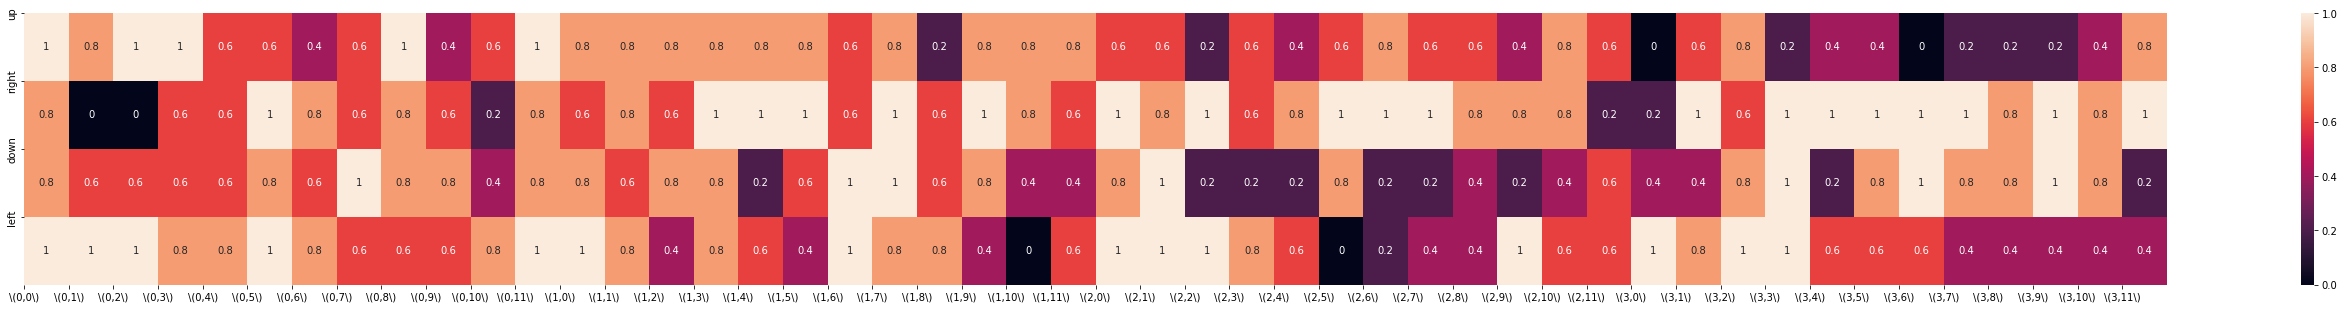

In [8]:
plt.figure(figsize=(48, 5))
ax = sns.heatmap(correction_rate_array.T, annot=True)
plt.yticks(ticks=[0, 1, 2, 3], labels=['up', 'right', 'down', 'left'])
coor_list = ["\({i},{j}\)".format(i=counter//12, j=counter%12) for counter in range(48)]
plt.xticks(ticks=np.arange(48), labels=coor_list)

In [9]:
#Overall correction rate (not excluding cliff)
state_num = correct_or_not.shape[0]
action_num = correct_or_not.shape[1]
correction_rate = np.where(correct_or_not == 1, 1, 0).sum()/(state_num*action_num*repeat)

In [10]:
correction_rate

0.6666666666666666

In [11]:
# Excluding impossible area
binary_correct_or_not_matrix = np.where(correct_or_not == 1, 1, 0)
binary_correct_or_not_matrix[37:48, :, :] = np.zeros([11, action_num, repeat])

In [12]:
# Correction rate in respect to states
state_wise_correction_rate = binary_correct_or_not_matrix.sum(-1).sum(-1).reshape(4,12)/(action_num*repeat)

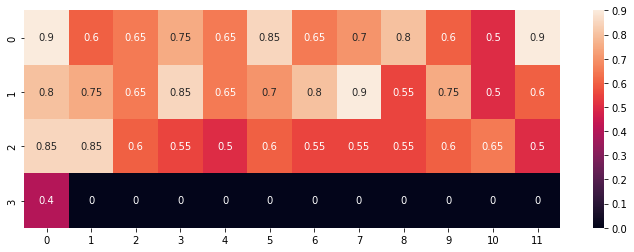

In [13]:
plt.figure(figsize=(12, 4))
ax = sns.heatmap(state_wise_correction_rate, annot=True)

In [14]:
# Overal noise excluding imposssible areas
1-binary_correct_or_not_matrix.sum() / ((state_num-11)*action_num*repeat )


0.3297297297297297

In [15]:
# Excluding all except for optimal path
optimal_path_only_matrix = np.where(correct_or_not == 1, 1, 0)
optimal_path_only_matrix[37:48, :, :] = np.zeros([11, action_num, repeat])
optimal_path_only_matrix[0:24, :, :] = np.zeros([24, action_num, repeat])

In [16]:
optimal_path_only_matrix_correction_rate = optimal_path_only_matrix.sum(-1).sum(-1).reshape(4,12)/(action_num*repeat)

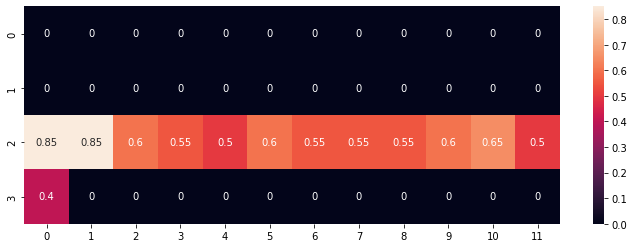

In [17]:
plt.figure(figsize=(12, 4))
ax = sns.heatmap(optimal_path_only_matrix_correction_rate, annot=True)

In [18]:
1-optimal_path_only_matrix.sum() / (13*action_num*repeat )

0.40384615384615385

In [19]:
response_array = response_array.reshape(4, 12, 4, 5)

In [20]:
response_array[3, 0, 0]

array(['{\n  "Reason": "Move up from [3,0] will result in [3,-1] which is outside the grid, so it\'s bad.",\n  "Feedback": "BAD"\n}',
       '{\n  "Reason": "Moving right from [3,0] will increase Y by 1 to [3,1], which is a valid move. This action will not hit the boundary or the cliff and is closer to the goal at [3,11].",\n  "Feedback": "GOOD"\n}',
       '{\n  "Reason": "Moving down from [3,0] would result in [3,1]. This is a valid move as it\'s within the grid boundaries. Additionally, moving down would not put the player on the cliff, as the cliff is at [3,1...10]. However, the goal is at [3,11] and moving down does not bring the player closer to the cliff, but it does not bring them closer to the goal either.",\n  "Feedback": "NEUTRAL"\n}',
       '{\n  "Reason": "Move left would result in a new coordinate [3, -1], but the y-coordinate cannot be less than 0, which means it hits the boundary.",\n  "Feedback": "BAD"\n}',
       '{\n  "Reason": "Moving up from [3,1] to [3,0] would b

In [21]:
response_array[3, 0, 2]

array(['{\n  "Reason": "Moving down from [3,2] would result in [3,3], this position is not a cliff position and is also closer to the goal.",\n  "Feedback": "GOOD"\n}',
       '{\n  "Reason": "Moving left from [3,2] would result in [3,-1] which is outside the grid boundaries, so the action is bad.",\n  "Feedback": "BAD"\n}',
       '{\n  "Reason": "Moving up will move the agent to [2, 3] which is within the grid and does not lead to the cliff.",\n  "Feedback": "GOOD"\n}',
       '{\n  "Reason": "Moving right would not put you closer to the goal, and you are already at the rightmost column. However, the action is still valid because it doesn\'t put you outside the grid or on the cliff.",\n  "Feedback": "GOOD"\n}',
       '{\n  "Reason": "Moving down from [3,3] to [4,3] will put you closer to the goal at [3,11]. Since the game environment does not specify any cliff at this location, it is a valid move. However, it\'s worth noting that moving down in this case will result in moving out of

In [22]:
response_array[2, 11, 2]

array(['{\n  "Reason": "Moving down from [2,9] would result in [3,9] which is not a cliff location and also closer to the goal [3,11] compared to the original state [2,9].",\n  "Feedback": "GOOD"\n}',
       '{\n  "Reason": "Moving left will not make you closer to the goal and will hit the boundary. The goal is at [3,11] and you are currently at [2,9]. Moving left will move you to [1,9] which is further away from the goal. Also, X cannot be less than 0.",\n  "Feedback": "bad"\n}',
       '{\n  "Reason": "Moving up from [2,10] will result in a new coordinate [1,10] which is still within the grid and does not lead to the goal. Moreover, the cliff is located at [3,1..10], so moving up does not lead to falling off the cliff.",\n  "Feedback": "BAD"\n}',
       '{\n  "Reason": "The action of moving right from [2,10] will result in [2,11] which is the goal. Therefore, this action is good because it will lead to the goal.",\n  "Feedback": "GOOD"\n}',
       '{\n  "Reason": "Moving down from [2

In [26]:
response_array

array([[[['{\n  "Reason": "Moving up from [0,0] would move the player to [-1, 0], which is outside the grid. The x-coordinate is already at the minimum allowed value of 0.",\n  "Feedback": "BAD"\n}',
          '{\n  "Reason": "The current state is [0,0], if you move right, you will reach [0,1] which is a valid state and is away from the cliff.",\n  "Feedback": "GOOD"\n}',
          '{\n  "Reason": "Moving down from [0,0] will move the player to [1,0], which is within the grid boundaries and does not lead to the cliff. However, it does not bring the player closer to the goal. But since we are only asking if it\'s a good or bad action from the perspective of not hitting boundaries or falling off the cliff, this action is good.",\n  "Feedback": "GOOD"\n}',
          '{\n  "Reason": "Moving left from [0,0] will result in [0,-1] which is outside the grid. X should be no less than 0.",\n  "Feedback": "bad"\n}',
          '{\n  "Reason": "Moving up would put the player at [0,0]. This is a val